<a href="https://colab.research.google.com/github/DeepakRathod1407/Code2021py/blob/main/HousingRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
%tensorflow_version 2.x
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

print(tf.__version__)

#import tensorflow_addons as tfa

#----------DATA READING 
filename = 'https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv'
# read file
csv_data = pd.read_csv(filename, sep=',')

#----------DATA CLEANUP 
# drop bad data
clean_data = csv_data.dropna() 

# normalize the data
norm_data = (clean_data-clean_data.min())/(clean_data.max()-clean_data.min()) 

print(norm_data.describe())
csv_data.shape

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.11.0
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean       0.476882      0.327867            0.540968      0.069637   
std        0.199718      0.227135            0.246803      0.057465   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.254980      0.147715            0.333333      0.038487   
50%        0.583665      0.181722            0.549020      0.056017   
75%        0.632470      0.550478            0.705882      0.083017   
max        1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean         0.083552      0.039984      0.082260       0.233354   
std          0.065410      0.032172      0.063233       0.131595   
min       

(17000, 9)

In [17]:
print(clean_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [19]:
#----------TRAIN/TEST SPLIT 
train_data = norm_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = norm_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features)
x_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

# separate out the y (results) from x (features)
x_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

Training Data
                       count      mean       std       min       25%       50%  \
longitude           13600.0  0.476223  0.200309  0.000000  0.253984  0.582669   
latitude            13600.0  0.328539  0.227668  0.000000  0.147715  0.181722   
housing_median_age  13600.0  0.539723  0.246401  0.019608  0.333333  0.549020   
total_rooms         13600.0  0.069379  0.056862  0.000158  0.038322  0.055885   
total_bedrooms      13600.0  0.083238  0.064932  0.000000  0.045624  0.066884   
population          13600.0  0.039837  0.031691  0.000000  0.022002  0.032568   
households          13600.0  0.081937  0.062789  0.000000  0.046045  0.066930   
median_income       13600.0  0.233442  0.131180  0.000000  0.143015  0.209383   

                         75%       max  
longitude           0.632470  0.984064  
latitude            0.550478  1.000000  
housing_median_age  0.705882  1.000000  
total_rooms         0.082984  0.844919  
total_bedrooms      0.100248  0.820764  
populatio

In [20]:
print(len(x_train.keys()))

8


In [22]:
#--------MODEL BUILDING
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_03"),
    # 1 node in the output for the median_house_vale
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              # loss function to minimize
              loss='mse',
              # list of metrics to monitor
              metrics=['mae',])

model.summary()

8
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_01 (Dense)            (None, 32)                288       
                                                                 
 dense_02 (Dense)            (None, 32)                1056      
                                                                 
 dense_03 (Dense)            (None, 32)                1056      
                                                                 
 Output_Layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [6]:
8*32 + 32

288

In [7]:
32*32 + 32

1056

In [8]:
32*1 + 1

33

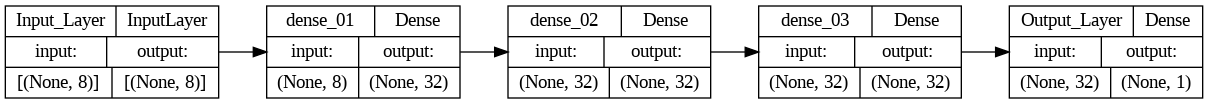

In [9]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96,
)

In [10]:
# Fit/Train model on training data
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
680/680 [==============================] - 4s 4ms/step - loss: 0.0280 - mae: 0.1218 - val_loss: 0.0209 - val_mae: 0.0980
Epoch 2/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0204 - mae: 0.1036 - val_loss: 0.0178 - val_mae: 0.0935
Epoch 3/20
680/680 [==============================] - 2s 3ms/step - loss: 0.0191 - mae: 0.0989 - val_loss: 0.0170 - val_mae: 0.0888
Epoch 4/20
680/680 [==============================] - 2s 3ms/step - loss: 0.0183 - mae: 0.0965 - val_loss: 0.0162 - val_mae: 0.0896
Epoch 5/20
680/680 [==============================] - 2s 3ms/step - loss: 0.0178 - mae: 0.0947 - val_loss: 0.0154 - val_mae: 0.0872
Epoch 6/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0172 - mae: 0.0930 - val_loss: 0.0157 - val_mae: 0.0841
Epoch 7/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0171 - mae: 0.0926 - val_loss: 0.0160 - val_mae: 0.0957
Epoch 8/20
680/680 [==============================] - 1s 2ms/step - loss: 0.

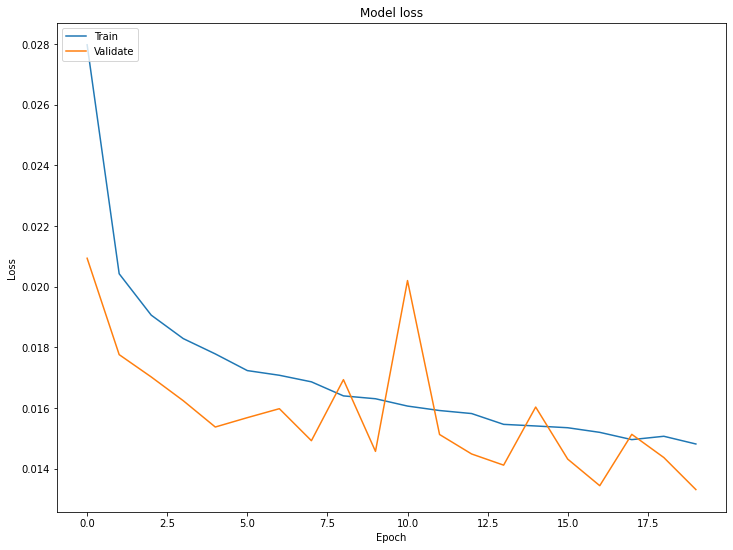

In [11]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [12]:
#--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)

107/107 - 0s - loss: 0.0136 - mae: 0.0814 - 205ms/epoch - 2ms/step
Loss: 0.013611402362585068 MAE: 0.08139244467020035


In [13]:
#--------PREDICT
p_test = model.predict(x_test)


107/107 [==============================] - 0s 1ms/step


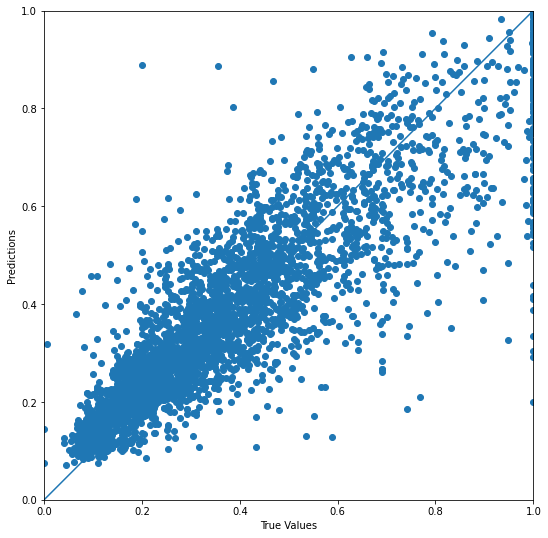

In [14]:
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

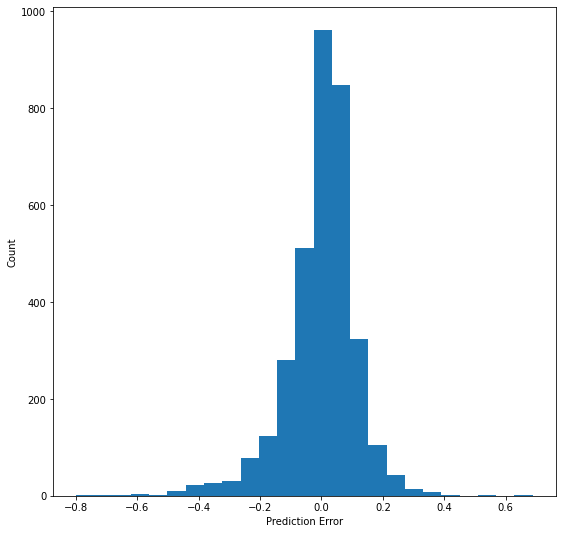

In [15]:
#---------PLOT the distribution of errors
fig = plt.figure(figsize=(9,9))
error = p_test.flatten() - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()